In [1]:
from src.timeseries_dataset import TimeSeriesDataset
from src.ks_kmeans import KS_KMeans
from src.plot_utils import (
    plot_metrics,
    plot_length_confidence_distribution,
)

from sklearn.metrics import (
    adjusted_rand_score,
    rand_score,
    normalized_mutual_info_score,
)
import matplotlib.pyplot as plt
import numpy as np

In [5]:
names = [
    "Plane",
    "NonInvasiveFetalECGThorax1",
    "UWaveGestureLibraryX",
    "UWaveGestureLibraryAll",
    "EOGHorizontalSignal",
    "ProximalPhalanxTW",
    "SwedishLeaf",
    "Symbols",
    "Car",
    "InlineSkate",
]
clusters = [7, 6, 5, 5, 4, 4, 4, 4, 4, 3]
for name, n_clusters in zip(names, clusters):
    dataset = TimeSeriesDataset(name, 1000, 5, 5)
    kmeans = KS_KMeans(n_clusters=n_clusters, basepoints_num=1000).fit(dataset.segments)

Fit function executed in 2215.8 seconds
Fit function executed in 2270.2 seconds


KeyboardInterrupt: 

In [6]:
names = [
    "Plane",
    "NonInvasiveFetalECGThorax1",
    "UWaveGestureLibraryX",
    "UWaveGestureLibraryAll",
    "EOGHorizontalSignal",
    "ProximalPhalanxTW",
    "SwedishLeaf",
    "Symbols",
    "Car",
    "InlineSkate",
]
clusters = [7, 6, 5, 5, 4, 4, 4, 4, 4, 3]
for name, n_clusters in zip(names, clusters):
    dataset = TimeSeriesDataset(name, 1000, 5, 5)
    kmeans = KS_KMeans(n_clusters=n_clusters, basepoints_num=500).fit(dataset.segments)

Fit function executed in 615.2 seconds
Fit function executed in 659.4 seconds
Fit function executed in 617.0 seconds
Fit function executed in 642.1 seconds
Fit function executed in 630.5 seconds
Fit function executed in 617.8 seconds
Fit function executed in 623.0 seconds
Fit function executed in 622.3 seconds
Fit function executed in 620.4 seconds
Fit function executed in 636.6 seconds


In [3]:
name = "Sinus"
n_clusters = 3
dataset = TimeSeriesDataset(name, 1000)
kmeans = KS_KMeans(n_clusters=n_clusters, basepoints_num=50).fit(dataset.segments)

Fit function executed in 22.6 seconds


In [ ]:
kmeans.plot_optimal_clusters()

In [ ]:
n = 10
ri_list, ari_list, nmi_list = [], [], []

for i in range(n):
    kmeans.calculate_kmeans(n_clusters=n_clusters)
    ri_i, ari_i, nmi_i = kmeans.calculate_metrics(dataset.labels)
    ri_list.append(ri_i)
    ari_list.append(ari_i)
    nmi_list.append(nmi_i)

ri_mean = np.mean(ri_list)
ari_mean = np.mean(ari_list)
nmi_mean = np.mean(nmi_list)

ri_std = np.std(ri_list)
ari_std = np.std(ari_list)
nmi_std = np.std(nmi_list)

# plot_metrics(ri_mean, ari_mean, nmi_mean)

print(f"RI: mean/std={ri_mean:.3f}/{ri_std:.3f}")
print(f"ARI: mean/std={ari_mean:.3f}/{ari_std:.3f}")
print(f"NMI: mean/std={nmi_mean:.3f}/{nmi_std:.3f}")

Rand Index: 0.5818398398398399
Adjusted Rand Index: 0.06121635415750903
Normalized Mutual Information: 0.06277042605719683


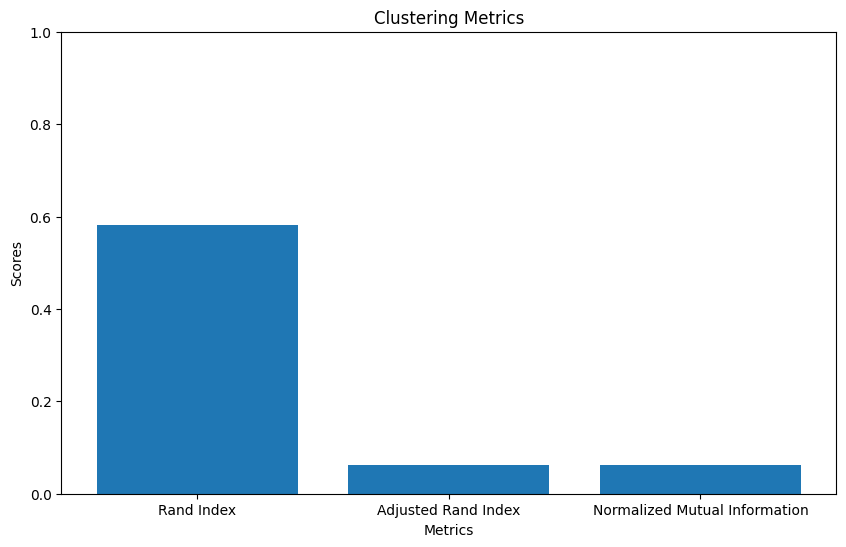

In [5]:
kmeans.plot_metrics(dataset.labels)


Confidence: [1, 1, 1, 1, 1, 1, 0.02271362410332487, 1, 0.08305982747823851, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9920493815116155, 1, 1, 0.10166216203613483, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.33611891417969614, 1, 1, 1, 1, 1, 0.1634888497022813, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.6979278951999498, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.43077948859356563, 1, 0.6684965208969095, 1, 1, 0.020094684393918903, 1, 1, 1, 1, 1, 0.4936036505892429, 1, 0.18315902797246772, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.3590045383630171, 0.07420580225594603, 1, 1, 1, 1, 0.9349343995901542, 1, 1, 1, 1, 0.9757830105784403, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.7031143839961143, 0.23988494339172528, 1, 1, 0.2900633405944097, 1, 0.009655739532762116, 1, 1, 0.3310066907365256, 1, 1, 1, 1, 0.8494776156838217, 1, 0.047378697711942246, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.8829272205251499, 1, 1, 0.34084453071630927, 0.8689679714205802, 1, 1, 1, 1, 1, 1, 0.42549202330843117, 1

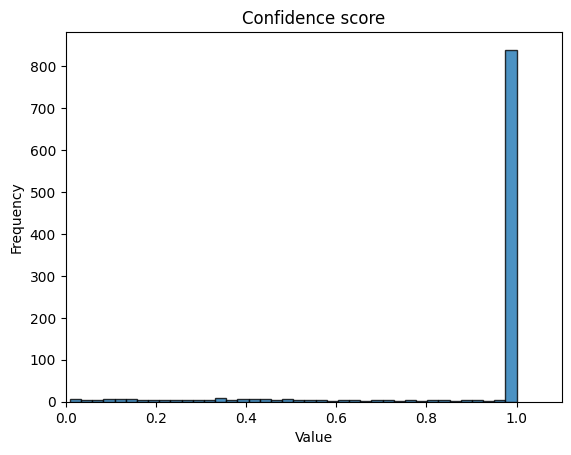

In [5]:
kmeans.plot_confidence()

Rand Index: 0.9814223465403364
Adjusted Rand Index: 0.9509100462432922
Normalized Mutual Information: 0.9479696330039803


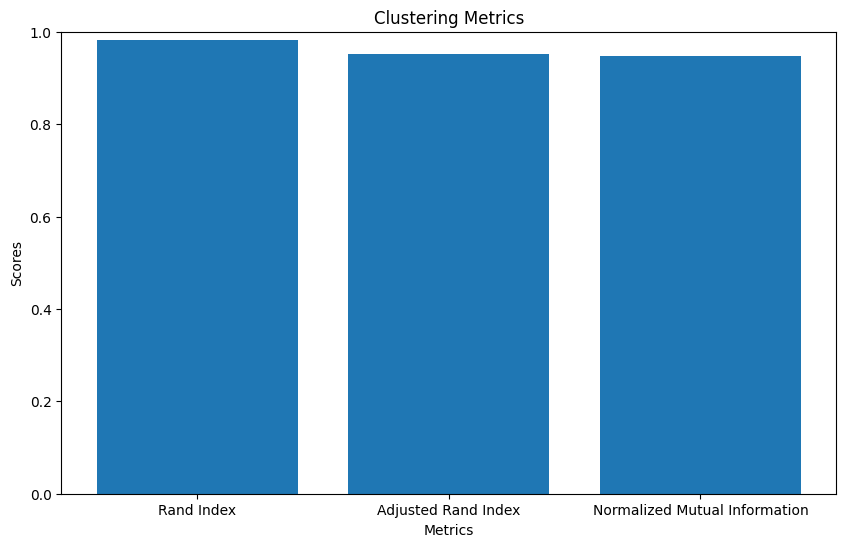

In [6]:
labels, gt_labels = kmeans.filter_by_confidence(dataset.labels, 0.8)
ri = rand_score(gt_labels, labels)
ari = adjusted_rand_score(gt_labels, labels)
nmi = normalized_mutual_info_score(gt_labels, labels)

plot_metrics(ri, ari, nmi)

/home/tmb2k01/tdk/src/plot_utils.py:53: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=label_to_color[label], label=f"Label {label}")


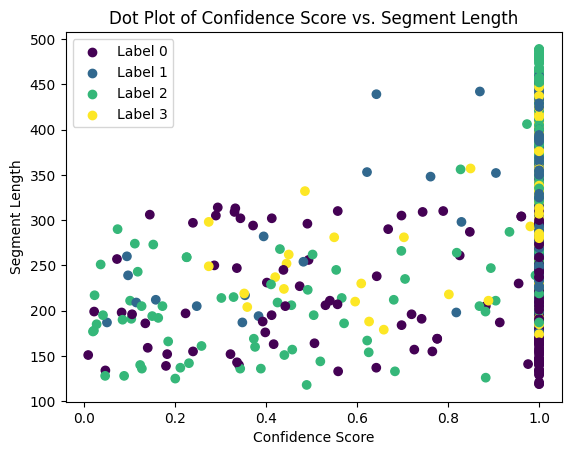

In [7]:
plot_length_confidence_distribution(kmeans)

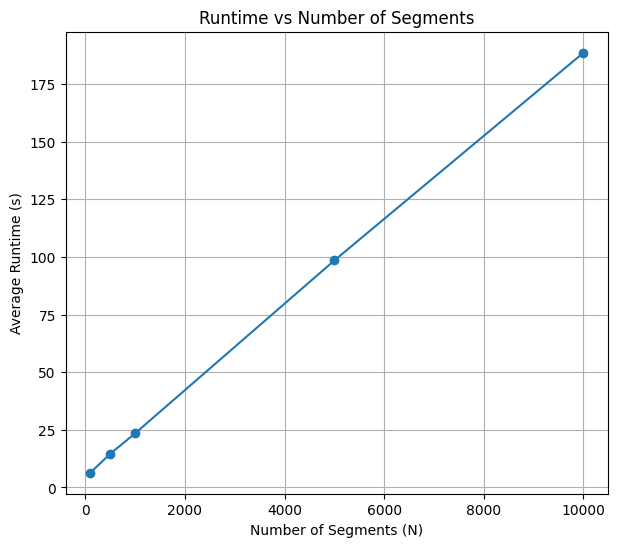

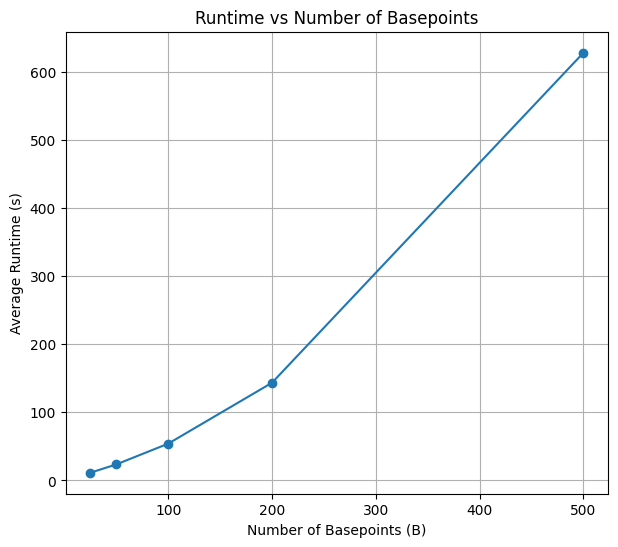

In [8]:
N = [100, 500, 1000, 5000, 10000]
avg_N = [6.4, 14.6, 23.5, 98.5, 188.6]

B = [25, 50, 100, 200, 500, 1000]
avg_B = [11.3, 23.5, 54, 143.5, 628.4, 2200]
plt.figure(figsize=(7, 6))
plt.plot(N, avg_N, marker="o")
plt.title("Runtime vs Number of Segments")
plt.xlabel("Number of Segments (N)")
plt.ylabel("Average Runtime (s)")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 6))
plt.plot(B, avg_B, marker="o")
plt.title("Runtime vs Number of Basepoints")
plt.xlabel("Number of Basepoints (B)")
plt.ylabel("Average Runtime (s)")
plt.grid(True)
plt.show()

In [ ]:
ari_matrix = np.zeros((11, 11))
names = [
    "Plane",
    "NonInvasiveFetalECGThorax1",
    "UWaveGestureLibraryX",
    "UWaveGestureLibraryAll",
    "EOGHorizontalSignal",
    "ProximalPhalanxTW",
    "SwedishLeaf",
    "Symbols",
    "Car",
    "InlineSkate",
]
clusters = [7, 6, 5, 5, 4, 4, 4, 4, 4, 3]

for k, name in enumerate(names):
    for i in range(11):
        for j in range(11):
            dataset = TimeSeriesDataset(name, 1000, i, j)
            path = None
            if i == 0 or j == 0:
                path = f"data/distances_1k/basepoints/{name}/{name}_1000_0_0.npy"
            else:
                path = f"data/distances_1k/basepoints/{name}/{name}_1000_{i}_{j}.npy"
            kmeans = KS_KMeans(n_clusters=n_clusters, basepoints_num=1000).fit(
                dataset.segments, path=path
            )

            for _ in range(1, 11):
                kmeans.calculate_cop_kmeans(clusters[k])
                ari = adjusted_rand_score(dataset.labels, kmeans.labels)
                ari_matrix[i, j] = ari_matrix[i, j] + ari
            ari_matrix[i, j] = ari_matrix[i, j] / 10

    plt.imshow(ari_matrix, cmap="viridis", interpolation="none", vmin=0, vmax=1)
    plt.colorbar()
    plt.xlabel("Error std")
    plt.ylabel("Sample percentage")
    plt.title(f"{name} ARI Matrix Heatmap")
    plt.savefig(f"./plots/gaussian_heatmaps/{name}_ari_matrix_heatmap.png")
    plt.show()

Fit function executed in 9.8 seconds
Rand Index: 0.8610768676867687
Adjusted Rand Index: 0.6299945442216565
Normalized Mutual Information: 0.6151556039526535


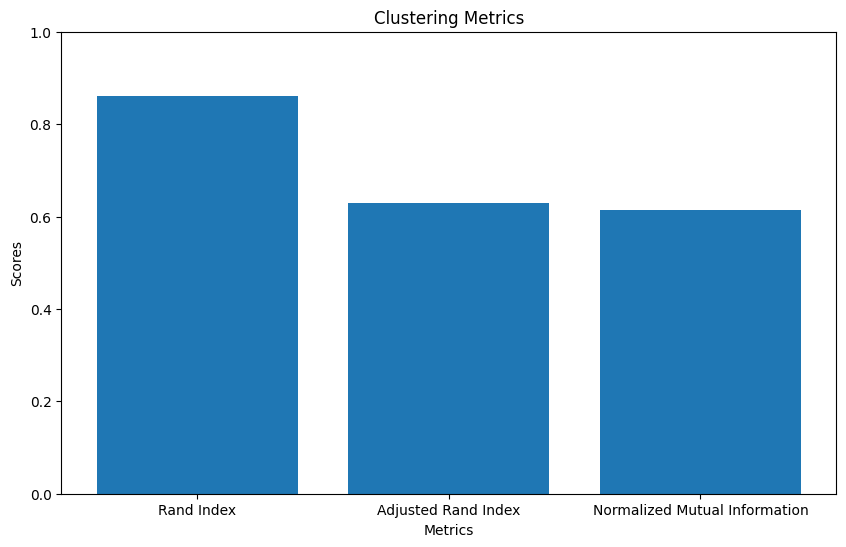


Confidence: [0.5572984856753311, 1, 0.3650282565091952, 0.6036464096485455, 0.8108648640502034, 1, 0.7719522049581693, 1, 0.033748030377570175, 0.3231565275305191, 0.7493128007334063, 1, 0.842085512488013, 0.7876594829948901, 0.35974936416378134, 0.2791291702681253, 0.6227647700296371, 0.4839894223109679, 0.22423433447239638, 0.4279803584087456, 0.9075573466530232, 0.9985412540782117, 0.6611966167057072, 0.9122930253316357, 0.021263912477870163, 0.1944064462237213, 0.7705213089910231, 0.7943483745597096, 0.9719701406269039, 0.0944100243158918, 0.3073472475753481, 0.10638689283254876, 0.17461127494128545, 0.3983122364778547, 0.24764749961850618, 0.6536447185309726, 0.12206829240582391, 0.36616976705584126, 0.03898561917530806, 0.5517695155640467, 1, 0.12928271379531095, 0.6412536795495714, 1, 0.36808957555404054, 0.40447586672636415, 0.2938753424199779, 0.636828447758468, 0.03247996431304455, 0.15569595181031678, 0.5421027562249894, 1, 0.850630325197775, 0.20116771414029502, 0.11765762

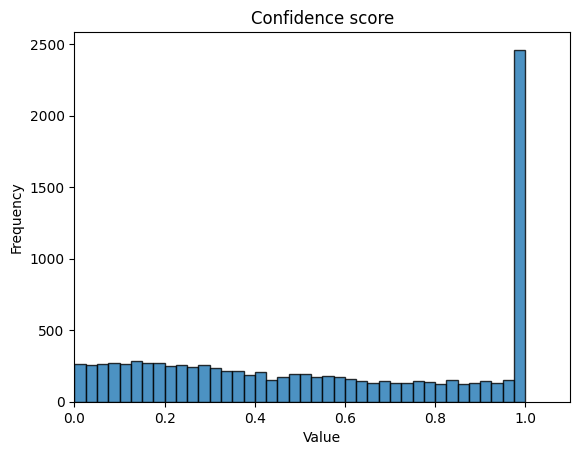

In [16]:
name = "Symbols"
n_clusters = 4
dataset = TimeSeriesDataset(name, 10000)
kmeans = KS_KMeans(n_clusters=n_clusters, basepoints_num=50).fit(
    dataset.segments, path=f"data/distances_10k/{name}_10k.npy"
)

kmeans.plot_metrics(dataset.labels)
kmeans.plot_confidence()

Fit function executed in 1.1 seconds
Rand Index: 0.8200720720720721
Adjusted Rand Index: 0.5210603632783297
Normalized Mutual Information: 0.535564060876707


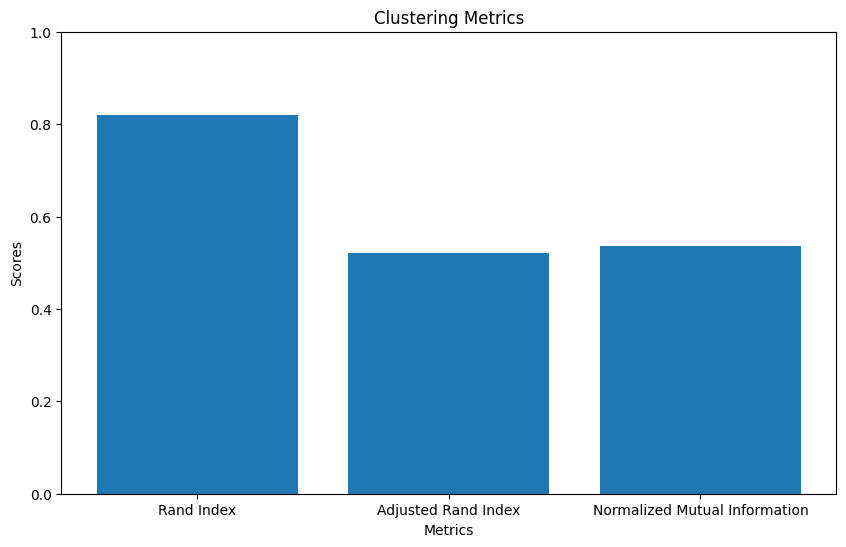


Confidence: [0.1842850110995103, 0.3648478107932999, 0.660744531823836, 0.20374898256138585, 0.14648273799224876, 0.32819702078988583, 0.09085660480052535, 0.3035824182501357, 0.1690038793768055, 0.10335072023101734, 0.17578633515083072, 0.019430130092870205, 0.3323514082819424, 1, 0.07003121997138827, 0.9344581314478184, 0.8066646921837751, 0.0217957532128699, 0.16438295104203493, 0.7512832222464957, 0.23419639741973494, 0.17412986705105601, 0.13988735789378418, 0.40958069268760056, 0.6154803454599563, 0.13290657953603768, 0.6042460567418306, 0.260959869066538, 0.23704844202267575, 0.528366265008939, 0.5432051607497688, 0.15743710756761425, 0.1530621317358178, 0.6253383526515985, 0.19581122951990299, 0.35212479087045867, 0.10131528853267713, 0.1912334807307244, 0.06485932684774118, 0.302856245533467, 0.31982553805374137, 0.21669280969899937, 0.43956350794888654, 0.08958214238235063, 0.11014172097273209, 0.45782170424585256, 0.160060478397487, 0.13843805925738079, 0.8520344656875575, 

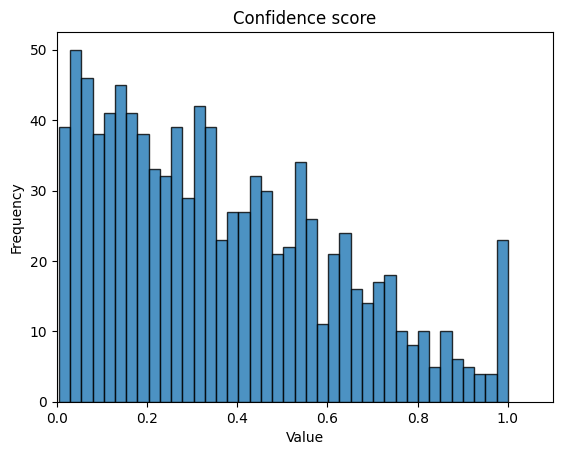

RI: 0.820, ARI: 0.521, NMI: 0.536
RI: 0.842, ARI: 0.582, NMI: 0.582
RI: 0.864, ARI: 0.640, NMI: 0.623
RI: 0.891, ARI: 0.716, NMI: 0.699
RI: 0.906, ARI: 0.762, NMI: 0.730
RI: 0.932, ARI: 0.831, NMI: 0.783
RI: 0.948, ARI: 0.879, NMI: 0.816
RI: 0.936, ARI: 0.862, NMI: 0.797
RI: 0.937, ARI: 0.866, NMI: 0.822
RI: 0.981, ARI: 0.962, NMI: 0.925
RI: 1.000, ARI: 1.000, NMI: 1.000


In [6]:
name = "Car"
n_clusters = 4
i, j = 4, 3
dataset = TimeSeriesDataset(name, 1000, i, j)
kmeans = KS_KMeans(n_clusters=n_clusters, basepoints_num=1000).fit(
    dataset.segments,
    path=f"data/distances_1k/basepoints/{name}/{name}_1000_{i}_{j}.npy",
)

kmeans.plot_metrics(dataset.labels)
kmeans.plot_confidence()

for i in range(0, 11):
    labels, gt_labels = kmeans.filter_by_confidence(dataset.labels, i / 10)
    ri = rand_score(gt_labels, labels)
    ari = adjusted_rand_score(gt_labels, labels)
    nmi = normalized_mutual_info_score(gt_labels, labels)
    print(f"RI: {ri:.3f}, ARI: {ari:.3f}, NMI: {nmi:.3f}")